# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [14]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf

month_file = '2_June'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


## General Overview

### Players, Visits, Sessions of Each Group

In [15]:

# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")
print('--------------------------------------------------')

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

# Reset index
df_bottom_20.index = np.arange(1, len(df_bottom_20) + 1)
df_top_20.index = np.arange(1, len(df_top_20) + 1)

# Round wageredamt and profit to 2 decimal places
df_bottom_20['wageredamt'] = df_bottom_20['wageredamt'].round(1)
df_bottom_20['profit'] = df_bottom_20['profit'].round(1)
df_bottom_20['percent_return'] = df_bottom_20['percent_return'].round(1)
df_top_20['wageredamt'] = df_top_20['wageredamt'].round(1)
df_top_20['profit'] = df_top_20['profit'].round(1)
df_top_20['percent_return'] = df_top_20['percent_return'].round(1)


--------------------------------------------------


In [16]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_bottom_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_bottom_20 = pd.concat([df_bottom_20, dummy_variables], axis=1).reset_index(drop=True)

# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_top_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_top_20 = pd.concat([df_top_20, dummy_variables], axis=1).reset_index(drop=True)

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                   'percent_return': [0.1, 0.5, 0.3, -0.2, 0.6, 0.2, 0.4, 0.8, -0.1]})

# create a shifted version of percent_return column
shifted = df['percent_return'].shift(1)

# create a condition that checks if both the current and previous value of percent_return are positive
condition = (df['percent_return'] > 0) & (shifted > 0)

# create the '2Ws' column based on the condition
df['2Ws'] = condition.astype(int)

# display the final dataframe
print(df)


In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                   'percent_return': [0.1, 0.5, 0.3, -0.2, 0.6, 0.2, 0.4, 0.8, -0.1]})

# create a shifted version of percent_return column
shifted = df.groupby('playerkey')['percent_return'].shift(1)

# create a condition that checks if both the current and previous value of percent_return are positive
condition = (df['percent_return'] > 0) & (shifted > 0)

# create the '2Ws' column based on the condition
df['2Ws'] = condition.astype(int)

# display the final dataframe
print(df)


In [ ]:
import pandas as pd

# create a sample dataframe
df = df_bottom_20

grouping = 'visit'
# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', grouping])['percent_return'].shift(1)

# create a condition that checks if the current and previous value of percent_return are positive
condition1 = (df['percent_return'] > 0) & (shifted > 0)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create a condition that checks if the current, previous, two rows up, and three rows up values of percent_return are positive
condition3 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0) & (shifted.shift(2) > 0)

# Column names
col1_name = f"2ws_{grouping[0]}"
col2_name = f"3ws_{grouping[0]}"
col3_name = f"4ws_{grouping[0]}"

# apply the conditions to create the '2Ws', '3Ws', and '4Ws' columns
for i, row in df.iterrows():
    if condition3[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i-2, col1_name] = 0
        df.loc[i-1, col2_name] = 0
        df.loc[i-2, col2_name] = 0
        df.loc[i, col3_name] = 1
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i-2, col3_name] = 0
    elif condition2[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i, col2_name] = 1
        df.loc[i-1, col2_name] = 0
        df.loc[i, col3_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i, col1_name] = 0
    elif condition1[i]:
        df.loc[i, col1_name] = 1
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0
    else:
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0

# display the updated dataframe

print(df)

In [ ]:
df = pf.consecutive_wins(df_bottom_20, groupby='visit')

print(df)

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E'],
                   'percent_return': [0.1, 0.5, 0.3, 0.2, 0.6, 0.2, 0.4, 0.8, 0.1, 0.1, 0.5, 0.3, 0.2, -0.1, -0.5, 0.3, 0.2],
                   'wagered_amt': [1, 5, 3, 2, 6, 2, 4, 8, 1, 1, 5, 3, 2, 1, 5, 3, 2],
                   'amount_won': [10, 50, 30, 20, -10, 60, 20, 40, 80, 10, 50, 30, 20, 10, 50, 30, 20],
                   'visit': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,2,2, 1,1,2,2]})

grouping = 'visit'
# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', grouping])['percent_return'].shift(1)

# create a condition that checks if the current and previous value of percent_return are positive
condition1 = (df['percent_return'] > 0) & (shifted > 0)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create a condition that checks if the current, previous, two rows up, and three rows up values of percent_return are positive
condition3 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0) & (shifted.shift(2) > 0)

# Column names
col1_name = f"2ws_{grouping[0]}"
col2_name = f"3ws_{grouping[0]}"
col3_name = f"4ws_{grouping[0]}"

# apply the conditions to create the '2Ws', '3Ws', and '4Ws' columns
for i, row in df.iterrows():
    if condition3[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i-2, col1_name] = 0
        df.loc[i-1, col2_name] = 0
        df.loc[i-2, col2_name] = 0
        df.loc[i, col3_name] = 1
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i-2, col3_name] = 0
    elif condition2[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i, col2_name] = 1
        df.loc[i-1, col2_name] = 0
        df.loc[i, col3_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i, col1_name] = 0
    elif condition1[i]:
        df.loc[i, col1_name] = 1
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0
    else:
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0

# Create new column called '2ws_amt' that contains the total amount won in the last 2 wins when 2ws_v is 1
condition4 = df[col1_name] == 1
condition5 = df[col2_name] == 1
condition6 = df[col3_name] == 1

amount_won_2ws = []
wagered_amt_2ws = []
for i, row in df.iterrows():
    if condition4[i]:
        amount_won_2ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'])
        wagered_amt_2ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'])
    else:
        amount_won_2ws.append(0)
        wagered_amt_2ws.append(0)

amount_won_3ws = []
wagered_amt_3ws = []
for i, row in df.iterrows():
    if condition5[i]:
        amount_won_3ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'])
        wagered_amt_3ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'])
    else:
        amount_won_3ws.append(0)
        wagered_amt_3ws.append(0)

amount_won_4ws = []
wagered_amt_4ws = []
for i, row in df.iterrows():
    if condition6[i]:
        amount_won_4ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'] + df.loc[i-3, 'amount_won'])
        wagered_amt_4ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'] + df.loc[i-3, 'wagered_amt'])
    else:
        amount_won_4ws.append(0)
        wagered_amt_4ws.append(0)

# Column names
col4_name = f"2ws_wonamt_{grouping[0]}"
col5_name = f"3ws_wonamt_{grouping[0]}"
col6_name = f"4ws_wonamt_{grouping[0]}"

col7_name = f"2ws_wgramt_{grouping[0]}"
col8_name = f"3ws_wgramt_{grouping[0]}"
col9_name = f"4ws_wgramt_{grouping[0]}"

# Add columns to dataframe
df[col4_name] = amount_won_2ws
df[col5_name] = amount_won_3ws 
df[col6_name] = amount_won_4ws

df[col7_name] = wagered_amt_2ws
df[col8_name] = wagered_amt_3ws
df[col9_name] = wagered_amt_4ws

print(df)


In [ ]:
# Create new column called '2ws_amt' that contains the total amount won in the last 2 wins when 2ws_v is 1
condition4 = df[col1_name] == 1
condition5 = df[col2_name] == 1
condition6 = df[col3_name] == 1

amount_won_2ws = []
wagered_amt_2ws = []
for i, row in df.iterrows():
    if condition4[i]:
        amount_won_2ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'])
        wagered_amt_2ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'])
    else:
        amount_won_2ws.append(0)
        wagered_amt_2ws.append(0)

amount_won_3ws = []
wagered_amt_3ws = []
for i, row in df.iterrows():
    if condition5[i]:
        amount_won_3ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'])
        wagered_amt_3ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'])
    else:
        amount_won_3ws.append(0)
        wagered_amt_3ws.append(0)

amount_won_4ws = []
wagered_amt_4ws = []
for i, row in df.iterrows():
    if condition6[i]:
        amount_won_4ws.append(df.loc[i, 'amount_won'] + df.loc[i-1, 'amount_won'] + df.loc[i-2, 'amount_won'] + df.loc[i-3, 'amount_won'])
        wagered_amt_4ws.append(df.loc[i, 'wagered_amt'] + df.loc[i-1, 'wagered_amt'] + df.loc[i-2, 'wagered_amt'] + df.loc[i-3, 'wagered_amt'])
    else:
        amount_won_4ws.append(0)
        wagered_amt_4ws.append(0)

# Column names
col4_name = f"2ws_wonamt_{grouping[0]}"
col5_name = f"3ws_wonamt_{grouping[0]}"
col6_name = f"4ws_wonamt_{grouping[0]}"

col7_name = f"2ws_wgramt_{grouping[0]}"
col8_name = f"3ws_wgramt_{grouping[0]}"
col9_name = f"4ws_wgramt_{grouping[0]}"

# Add columns to dataframe
df[col4_name] = amount_won_2ws
df[col5_name] = amount_won_3ws 
df[col6_name] = amount_won_4ws

df[col7_name] = wagered_amt_2ws
df[col8_name] = wagered_amt_3ws
df[col9_name] = wagered_amt_4ws

 
print(df)

In [ ]:
# Test on actual dataframe

df = df_bottom_20

grouping = 'visit'
# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', grouping])['percent_return'].shift(1)

# create a condition that checks if the current and previous value of percent_return are positive
condition1 = (df['percent_return'] > 0) & (shifted > 0)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create a condition that checks if the current, previous, two rows up, and three rows up values of percent_return are positive
condition3 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0) & (shifted.shift(2) > 0)

# Column names
col1_name = f"2ws_{grouping[0]}"
col2_name = f"3ws_{grouping[0]}"
col3_name = f"4ws_{grouping[0]}"

# apply the conditions to create the '2Ws', '3Ws', and '4Ws' columns
for i, row in df.iterrows():
    if condition3[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i-2, col1_name] = 0
        df.loc[i-1, col2_name] = 0
        df.loc[i-2, col2_name] = 0
        df.loc[i, col3_name] = 1
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i-2, col3_name] = 0
    elif condition2[i]:
        df.loc[i-1, col1_name] = 0
        df.loc[i, col2_name] = 1
        df.loc[i-1, col2_name] = 0
        df.loc[i, col3_name] = 0
        df.loc[i-1, col3_name] = 0
        df.loc[i, col1_name] = 0
    elif condition1[i]:
        df.loc[i, col1_name] = 1
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0
    else:
        df.loc[i, col1_name] = 0
        df.loc[i, col2_name] = 0
        df.loc[i, col3_name] = 0

# Create new column called '2ws_amt' that contains the total amount won in the last 2 wins when 2ws_v is 1
condition4 = df[col1_name] == 1
condition5 = df[col2_name] == 1
condition6 = df[col3_name] == 1

amount_won_2ws = []
wagered_amt_2ws = []
for i, row in df.iterrows():
    if condition4[i]:
        amount_won_2ws.append(df.loc[i, 'profit'] + df.loc[i-1, 'profit'])
        wagered_amt_2ws.append(df.loc[i, 'wageredamt'] + df.loc[i-1, 'wageredamt'])
    else:
        amount_won_2ws.append(0)
        wagered_amt_2ws.append(0)

amount_won_3ws = []
wagered_amt_3ws = []
for i, row in df.iterrows():
    if condition5[i]:
        amount_won_3ws.append(df.loc[i, 'profit'] + df.loc[i-1, 'profit'] + df.loc[i-2, 'profit'])
        wagered_amt_3ws.append(df.loc[i, 'wageredamt'] + df.loc[i-1, 'wageredamt'] + df.loc[i-2, 'wageredamt'])
    else:
        amount_won_3ws.append(0)
        wagered_amt_3ws.append(0)

amount_won_4ws = []
wagered_amt_4ws = []
for i, row in df.iterrows():
    if condition6[i]:
        amount_won_4ws.append(df.loc[i, 'profit'] + df.loc[i-1, 'profit'] + df.loc[i-2, 'profit'] + df.loc[i-3, 'profit'])
        wagered_amt_4ws.append(df.loc[i, 'wageredamt'] + df.loc[i-1, 'wageredamt'] + df.loc[i-2, 'wageredamt'] + df.loc[i-3, 'wageredamt'])
    else:
        amount_won_4ws.append(0)
        wagered_amt_4ws.append(0)

# Column names
col4_name = f"2ws_profit_{grouping[0]}"
col5_name = f"3ws_profit_{grouping[0]}"
col6_name = f"4ws_profit_{grouping[0]}"

col7_name = f"2ws_wgramt_{grouping[0]}"
col8_name = f"3ws_wgramt_{grouping[0]}"
col9_name = f"4ws_wgramt_{grouping[0]}"

# Add columns to dataframe
df[col4_name] = amount_won_2ws
df[col5_name] = amount_won_3ws 
df[col6_name] = amount_won_4ws

df[col7_name] = wagered_amt_2ws
df[col8_name] = wagered_amt_3ws
df[col9_name] = wagered_amt_4ws

# Create a column called 'profit/bet' that contains the ratio of profit to wagered amount
df['profit/bet'] = df['profit'] / df['wageredamt']
df63 = df

In [17]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'visit')
df_top_20 = pf.consecutive_wins(df_top_20, 'visit')

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'playerkey': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
                   'percent_return': [0.1, 0.5, 0.3, 0.2, -0.1, 0.6, -0.2, 0.4, 0.8, -0.1],
                   'amount_won': [10, 50, 30, 20, -10, 60, -20, 40, 80, -10],
                   'visit': [1, 2, 3, 1, 2, 3, 1, 1, 1, 2]})

# create a shifted version of percent_return column within each player's visit
shifted = df.groupby(['playerkey', 'visit'])['percent_return'].shift(1)

# create a condition that checks if the current, previous, and two rows up values of percent_return are positive
condition2 = (df['percent_return'] > 0) & (shifted > 0) & (shifted.shift(1) > 0)

# create the '3Ws' column based on the condition
df['3Ws'] = condition2.astype(int)

# display the final dataframe
print(df)


### Rank Differences

### Gender Differences

### Age Differences

In [18]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

### Increse and Decrease of SlotDenomination and Bet

In [19]:
import counting_fns as cf


In [20]:
# Lets cound the number of times a player increase slot denominations
players_increase_slot_t20 = cf.count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = cf.count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_t20 = cf.count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = cf.count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 34
Count of times each player increase_slotdeno : {17: 1, 19: 3, 20: 26, 29: 25, 33: 15, 43: 1, 69: 1, 89: 2, 90: 1, 92: 1, 103: 3, 135: 1, 144: 15, 159: 5, 188: 1, 194: 1, 222: 4, 224: 2, 234: 6, 244: 1, 263: 1, 264: 12, 308: 3, 313: 1, 319: 1, 322: 2, 331: 5, 351: 1, 361: 1, 363: 50, 410: 1, 461: 1, 475: 171, 507: 1}
Player who changes the most: 475
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_slotdeno : 31
Count of times each player decrease_slotdeno : {17: 1, 19: 2, 20: 24, 29: 25, 33: 14, 43: 1, 69: 2, 89: 2, 99: 1, 103: 4, 135: 1, 144: 15, 159: 7, 188: 1, 222: 4, 224: 3, 234: 5, 244: 1, 263: 1, 264: 13, 308: 2, 322: 2, 331: 4, 351: 1, 361: 1, 363: 48, 410: 1, 461: 1, 475: 172, 507: 1, 521: 1}
Player who changes the most: 475
------------------------------------------------------------------------------------------------------------------
Cou

In [8]:
# Lets do the same but for bottom 20%
players_increase_slot_b20 = cf.count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_b20 = cf.count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_b20 = cf.count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_b20 = cf.count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 4
Count of times each player increase_slotdeno : {67: 1, 219: 1, 223: 1, 248: 1}
Player who changes the most: 67
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_slotdeno : 1
Count of times each player decrease_slotdeno : {406: 1}
Player who changes the most: 406
------------------------------------------------------------------------------------------------------------------
Count of players who increase_maxbet : 3
Count of times each player increase_maxbet : {164: 1, 236: 1, 406: 1}
Player who changes the most: 164
------------------------------------------------------------------------------------------------------------------
Count of players who decrease_maxbet : 6
Count of times each player decrease_maxbet : {67: 1, 219: 1, 223: 1, 236: 2, 389: 1, 457: 1}
Player who changes the most: 236
----------------------------------------------------------

### Wealth Differences
#### General

# TEST MACHINE COUNTS


#### Per Visit

In [ ]:
grouped = df_bottom_20.groupby(['playerkey', 'visit'])

print(grouped['profit/bet'].max())



In [26]:
# Create dataframe
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])

# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df_bottom_20['time_diff'] = df_bottom_20.groupby(['playerkey', 'session_time'])['start_time'].diff()
df_top_20['time_diff'] = df_top_20.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df_bottom_20['time_diff'] = df_bottom_20['time_diff'].dt.total_seconds().fillna(0)
df_top_20['time_diff'] = df_top_20['time_diff'].dt.total_seconds().fillna(0)

In [67]:
# Lets crate a column called 'rate_of_gain' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_bottom_20['depletion_rate'] = df_bottom_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)

-0.0


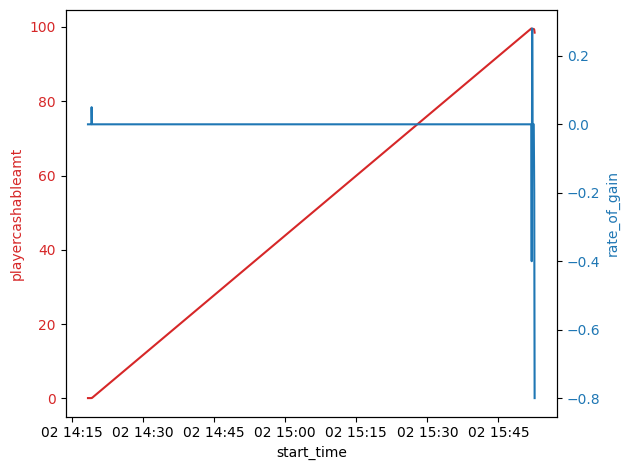

5.5


In [74]:
# Lets use only player 13 for now
df_bottom_20_13 = df_bottom_20[df_bottom_20['playerkey'] == 148
                               ]

# Calcualte average rate of gain
avg_rate_of_gain = df_bottom_20_13['depletion_rate'].mean()
print(round(avg_rate_of_gain, 1))

# Lets graph playercashableamt vs start_time in y1 and rate_of_gain vs start_time in y2
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('start_time')
ax1.set_ylabel('playercashableamt', color=color)
ax1.plot(df_bottom_20_13['start_time'], df_bottom_20_13['playercashableamt'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'
ax2.set_ylabel('rate_of_gain', color=color)  # we already handled the x-label with ax1
ax2.plot(df_bottom_20_13['start_time'], df_bottom_20_13['rate_of_gain'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# import stats
from scipy import stats

# Let's calculate the slope of the line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_bottom_20_13['gambles'], df_bottom_20_13['playercashableamt'])
print(round(slope, 1))

In [13]:
# Group by 'playerkey' bottom 20%
grouped_b = df_bottom_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Group by 'playerkey' 
grouped_t = df_top_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Filter time_diff column to only include values greater than 0
filtered_b = df_bottom_20[df_bottom_20['time_diff'] > 0]

# Group by 'playerkey'
filter_grouped_b = filtered_b.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Filter time_diff column to only include values greater than 0
filtered_t = df_top_20[df_top_20['time_diff'] > 0]

# Group by 'playerkey'
filter_grouped_t = filtered_t.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Create df_all_b dataframe
df_all_b = pd.DataFrame({
    'rank': grouped_b['rank'].first(),
    'gender': grouped_b['gender'].first(),
    'age_range': grouped_b['age_range'].first(),
    'age_gen': grouped_b['age_gen'].first(),
    'beginning_amt': grouped_b['playercashableamt'].first(),
    'ending_amt': grouped_b['playercashableamt'].last(),
    'ending_balance': b_amount_won_lost_each,
    'ave_slotdenom': grouped_b['slotdenomination'].mean(),
    'min_slotdenom': grouped_b['slotdenomination'].min(),
    'max_slotdenom': grouped_b['slotdenomination'].max(),
    'ave_theo_payback' : grouped_b['theoreticalpaybackpercent'].mean(),
    'min_theo_payback' : grouped_b['theoreticalpaybackpercent'].min(),
    'max_theo_payback': grouped_b['theoreticalpaybackpercent'].max(),
    'ave_wageramt': grouped_b['wageredamt'].mean(),
    'min_wager': grouped_b['wageredamt'].min(),
    'max_wager': grouped_b['wageredamt'].max(),
    'ave_p/b': grouped_b['profit/bet'].mean(),
    'min_p/b': grouped_b['profit/bet'].min(),
    'max_p/b': grouped_b['profit/bet'].max(),
    'first_outcome': grouped_b['result_type'].first(),
    'first_p/b': grouped_b['profit/bet'].first(),
    'last_outcome': grouped_b['result_type'].last(),
    'last_p/b': grouped_b['profit/bet'].last(),
    'machine_changes': grouped_b['machines_played'].sum(),
    '#W': grouped_b['#G'].sum(),
    '#L': grouped_b['#L'].sum(),
    '#NH': grouped_b['#N'].sum(),
    '#D': grouped_b['#D'].sum(),
    'w/g': grouped_b['#G'].sum()/grouped_b['gambles_visit'].last(),
    'l/g': grouped_b['#L'].sum()/grouped_b['gambles_visit'].last(),
    'nh/g': grouped_b['#N'].sum()/grouped_b['gambles_visit'].last(),
    'd/g': grouped_b['#D'].sum()/grouped_b['gambles_visit'].last(),
    '#2ws': grouped_b['#2ws'].sum(),
    '2ws_profit': grouped_b['2ws_profit'].sum(),
    '2ws_wgramt': grouped_b['2ws_wgramt'].sum(),
    # '2ws_p/b': grouped_b['2ws_profit'].sum()/grouped_b['2ws_wgramt'].sum(),
    '#3ws': grouped_b['#3ws'].sum(),
    '3ws_profit': grouped_b['3ws_profit'].sum(),
    '3ws_wgramt': grouped_b['3ws_wgramt'].sum(),
    # '3ws_p/b': grouped_b['3ws_profit'].sum()/grouped_b['3ws_wgramt'].sum(),
    '#4ws': grouped_b['#4ws'].sum(),
    '4ws_profit': grouped_b['4ws_profit'].sum(),
    '4ws_wgramt': grouped_b['4ws_wgramt'].sum(),
    # '4ws_p/b': grouped_b['4ws_profit'].sum()/grouped_b['4ws_wgramt'].sum(),
    'ave_time_per_gamble': filter_grouped_b['time_diff'].mean(),
    'std_time_per_gamble': filter_grouped_b['time_diff'].std(),
    'min_time_per_gamble': filter_grouped_b ['time_diff'].min(),
    'max_time_per_gamble': grouped_b['time_diff'].max(),
    'total_duration': grouped_b['duration'].sum(),
    'total_playtime': grouped_b['start_time'].last()-grouped_b['start_time'].first(),
    'total_gambles': grouped_b['gambles_visit'].last(),
}).dropna()

# Calculate the unique machines played by each player
unique_machines_b = grouped_b['assetnumber'].nunique().reset_index()

# Keep only player key and assetnumber columns
unique_machines_b = unique_machines_b[['playerkey', 'visit', 'assetnumber']]

# Keep only rows where assetnumber is not 0
unique_machines_b = unique_machines_b[unique_machines_b['assetnumber'] != 0]

# Rename assetnumber column to 'unique_machines'
unique_machines_b = unique_machines_b.rename(columns={'assetnumber': 'unique_machines'})

# Calculate total duration per machine for each player
total_duration_per_machine = df_bottom_20.groupby(['playerkey', 'assetnumber', 'visit'])['duration'].sum().reset_index()

# Calculate average time per machine
average_time_machine = total_duration_per_machine.groupby(['playerkey', 'visit'])['duration'].mean().reset_index()

# Rename duration column to 'ave_time_per_machine'
average_time_machine = average_time_machine.rename(columns={'duration': 'ave_time_per_machine'})

# Merger unique_machines_t and average_time_machine with df_all_t on 'playerkey' column
df_all_b = df_all_b.merge(unique_machines_b, on=['playerkey', 'visit'], how='left')
df_all_b = df_all_b.merge(average_time_machine, on=['playerkey', 'visit'], how='left')

df_all_b['total_duration'] = pd.to_timedelta(df_all_b['total_duration'])
df_all_b['w/min'] = df_all_b['#W'] / (df_all_b['total_duration'].dt.total_seconds() / 60)
df_all_b['l/min'] = df_all_b['#L'] / (df_all_b['total_duration'].dt.total_seconds() / 60)
df_all_b['nh/min'] = df_all_b['#NH'] / (df_all_b['total_duration'].dt.total_seconds() / 60)
df_all_b['d/min'] = df_all_b['#D'] / (df_all_b['total_duration'].dt.total_seconds() / 60)

df_all_b['percentile'] = 'Bottom 20%'

# Create df_all_t dataframe
df_all_t = pd.DataFrame({
    'rank': grouped_t['rank'].first(),
    'gender': grouped_t['gender'].first(),
    'age_range': grouped_t['age_range'].first(),
    'beginning_amt': grouped_t['playercashableamt'].first(),
    'ending_amt': grouped_t['playercashableamt'].last(),
    'ending_balance': t_amount_won_lost_each,
    'ave_slotdenom': grouped_t['slotdenomination'].mean(),
    'min_slotdenom': grouped_t['slotdenomination'].min(),
    'max_slotdenom': grouped_t['slotdenomination'].max(),
    'ave_theo_payback' : grouped_t['theoreticalpaybackpercent'].mean(),
    'min_theo_payback' : grouped_t['theoreticalpaybackpercent'].min(),
    'max_theo_payback': grouped_t['theoreticalpaybackpercent'].max(),
    'ave_wageramt': grouped_t['wageredamt'].mean(),
    'min_wager': grouped_t['wageredamt'].min(),
    'max_wager': grouped_t['wageredamt'].max(),
    'ave_p/b': grouped_t['profit/bet'].mean(),
    'min_p/b': grouped_t['profit/bet'].min(),
    'max_p/b': grouped_t['profit/bet'].max(),
    'first_outcome': grouped_t['result_type'].first(),
    'first_p/b': grouped_t['profit/bet'].first(),
    'last_outcome': grouped_t['result_type'].last(),
    'last_p/b': grouped_t['profit/bet'].last(),
    'machine_changes': grouped_t['machines_played'].sum(),
    '#W': grouped_t['#G'].sum(),
    '#L': grouped_t['#L'].sum(),
    '#NH': grouped_t['#N'].sum(),
    '#D': grouped_t['#D'].sum(),
    'w/g': grouped_t['#G'].sum()/grouped_t['gambles_visit'].last(),
    'l/g': grouped_t['#L'].sum()/grouped_t['gambles_visit'].last(),
    'nh/g': grouped_t['#N'].sum()/grouped_t['gambles_visit'].last(),
    'd/g': grouped_t['#D'].sum()/grouped_t['gambles_visit'].last(),
    '#2ws': grouped_t['#2ws'].sum(),
    '2ws_profit': grouped_t['2ws_profit'].sum(),
    '2ws_wgramt': grouped_t['2ws_wgramt'].sum(),
    # '2ws_p/b': grouped_t['2ws_profit'].sum()/grouped_t['2ws_wgramt'].sum(),
    '#3ws': grouped_t['#3ws'].sum(),
    '3ws_profit': grouped_t['3ws_profit'].sum(),
    '3ws_wgramt': grouped_t['3ws_wgramt'].sum(),
    # '3ws_p/b': grouped_t['3ws_profit'].sum()/grouped_t['3ws_wgramt'].sum(),
    '#4ws': grouped_t['#4ws'].sum(),
    '4ws_profit': grouped_t['4ws_profit'].sum(),
    '4ws_wgramt': grouped_t['4ws_wgramt'].sum(),
    # '4ws_p/b': grouped_t['4ws_profit'].sum()/grouped_t['4ws_wgramt'].sum(),
    'ave_time_per_gamble': filter_grouped_t['time_diff'].mean(),
    'std_time_per_gamble': filter_grouped_t['time_diff'].std(),
    'min_time_per_gamble': filter_grouped_t['time_diff'].min(),
    'max_time_per_gamble': grouped_t['time_diff'].max(),
    'total_duration': grouped_t['duration'].sum(),
    'total_playtime': grouped_t['start_time'].last()-grouped_t['start_time'].first(),
    'total_gambles': grouped_t['gambles_visit'].last(),
}).dropna()

# Calculate the unique machines played by each player
unique_machines_t = grouped_t['assetnumber'].nunique().reset_index()

# Keep only player key and assetnumber columns
unique_machines_t = unique_machines_t[['playerkey', 'visit', 'assetnumber']]

# Keep only rows where assetnumber is not 0
unique_machines_t = unique_machines_t[unique_machines_t['assetnumber'] != 0]

# Rename assetnumber column to 'unique_machines'
unique_machines_t = unique_machines_t.rename(columns={'assetnumber': 'unique_machines'})

# Calculate total duration per machine for each player
total_duration_per_machine_t = df_top_20.groupby(['playerkey', 'assetnumber', 'visit'])['duration'].sum().reset_index()

# Calculate average time per machine
average_time_machine_t = total_duration_per_machine_t.groupby(['playerkey', 'visit'])['duration'].mean().reset_index()

# Rename duration column to 'ave_time_per_machine'
average_time_machine_t = average_time_machine_t.rename(columns={'duration': 'ave_time_per_machine'})

# Merger unique_machines_t and average_time_machine with df_all_t on 'playerkey' column
df_all_t = df_all_t.merge(unique_machines_t, on=['playerkey', 'visit'], how='left')
df_all_t = df_all_t.merge(average_time_machine_t, on=['playerkey', 'visit'], how='left')

df_all_t['total_duration'] = pd.to_timedelta(df_all_t['total_duration'])
df_all_t['w/min'] = df_all_t['#W'] / (df_all_t['total_duration'].dt.total_seconds() / 60)
df_all_t['l/min'] = df_all_t['#L'] / (df_all_t['total_duration'].dt.total_seconds() / 60)
df_all_t['nh/min'] = df_all_t['#NH'] / (df_all_t['total_duration'].dt.total_seconds() / 60)
df_all_t['d/min'] = df_all_t['#D'] / (df_all_t['total_duration'].dt.total_seconds() / 60)

df_all_t['percentile'] = 'Top 20%'

# Concatenate dataframes
df_all = pd.concat([df_all_b, df_all_t]).reset_index()

In [ ]:
# Create dataframe
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])

# Group by 'playerkey' 
grouped_t = df_top_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the unique machines played by each player
unique_machines_t = grouped_t['assetnumber'].nunique().reset_index()

# Keep only player key and assetnumber columns
unique_machines_t = unique_machines_t[['playerkey', 'visit', 'assetnumber']]

# Keep only rows where assetnumber is not 0
unique_machines_t = unique_machines_t[unique_machines_t['assetnumber'] != 0]

# Rename assetnumber column to 'unique_machines'
unique_machines_t = unique_machines_t.rename(columns={'assetnumber': 'unique_machines'})

# Calculate total duration per machine for each player
total_duration_per_machine_t = df_top_20.groupby(['playerkey', 'assetnumber', 'visit'])

#Differenvce between start and end time
times = (total_duration_per_machine_t['start_time'].last()-total_duration_per_machine_t['start_time'].first()).reset_index()

# Rename duration column to 'total_duration'
times = times.rename(columns={'start_time': 'total_time_per_machine'})

# Group by 'playerkey' and 'visit' and take mean of total_duration 
ave_times = times.groupby(['playerkey', 'visit'])['total_time_per_machine'].mean().reset_index()

# Rename duration column to 'ave_time_per_machine'
ave_times = ave_times.rename(columns={'total_time_per_machine': 'ave_time_per_machine'})


In [ ]:
df_all['total_duration'] = pd.to_timedelta(df_all['total_duration'])
df_all['wins/min'] = df_all['#W'] / (df_all['total_duration'].dt.total_seconds() / 60)

## Let's try to make a fucntion 

In [ ]:
def merge_dfs_per_player(data_t, data_b, grouping, print_results=True):
    # Group by 'playerkey' bottom 20%
    grouped_b = data_b.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', grouping])

    # Calculate the amount won or lost by each player
    b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

   
    # Group by 'playerkey' 
    grouped_t = data_t.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', grouping])

    # Calculate the amount won or lost by each player
    t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

    if grouping == 'visit':
        column_gambles = 'gambles_visit'
    elif grouping == 'session_time':
        column_gambles = 'gambles_session'


    # Create df_all_b dataframe
    df_all_b = pd.DataFrame({
        'beginning_amt': grouped_b['playercashableamt'].first(),
        'ending_amt': grouped_b['playercashableamt'].last(),
        'ending_balance': b_amount_won_lost_each,
        'ave_slotdenom': grouped_b['slotdenomination'].mean(),
        'ave_theo_payback' : grouped_b['theoreticalpaybackpercent'].mean(),
        'ave_return' : grouped_b['percent_return'].mean(),
        'ave_wageramt': grouped_b['wageredamt'].mean(),
        'ave_p/b': grouped_b['profit/bet'].mean(),
        'max_p/b': grouped_t['profit/bet'].max(),
        'first_outcome': grouped_b['result_type'].first(),
        'first_p/b': grouped_b['profit/bet'].first(),
        'last_outcome': grouped_b['result_type'].last(),
        'last_p/b': grouped_b['profit/bet'].last(),
        'machines_changes': grouped_b['machines_played'].sum()-1,
        '#W': grouped_b['#G'].sum(),
        '#L': grouped_b['#L'].sum(),
        '#NH': grouped_b['#N'].sum(),
        '#D': grouped_b['#D'].sum(),
        'w/g': grouped_b['#G'].sum()/grouped_b[column_gambles].last(),
        'l/g': grouped_b['#L'].sum()/grouped_b[column_gambles].last(),
        'nh/g': grouped_b['#N'].sum()/grouped_b[column_gambles].last(),
        'd/g': grouped_b['#D'].sum()/grouped_b[column_gambles].last(),
        '#2ws': grouped_b['#2ws'].sum(),
        '2ws_profit': grouped_b['2ws_profit'].sum(),
        '2ws_wgramt': grouped_b['2ws_wgramt'].sum(),
        '#3ws': grouped_b['#3ws'].sum(),
        '3ws_profit': grouped_b['3ws_profit'].sum(),
        '3ws_wgramt': grouped_b['3ws_wgramt'].sum(),
        '#4ws': grouped_b['#4ws'].sum(),
        '4ws_profit': grouped_b['4ws_profit'].sum(),
        '4ws_wgramt': grouped_b['4ws_wgramt'].sum(),
        'ave_time_per_gamble': grouped_b['duration'].mean(),
        'total_duration': grouped_b['duration'].sum(),
        'total_gambles': grouped_b[column_gambles].last(),
    }).dropna()

    # Calculate the unique machines played by each player
    unique_machines_b = grouped_b['assetnumber'].nunique().reset_index()

    # Keep only player key and assetnumber columns
    unique_machines_b = unique_machines_b[['playerkey', grouping, 'assetnumber']]

    # Keep only rows where assetnumber is not 0
    unique_machines_b = unique_machines_b[unique_machines_b['assetnumber'] != 0]

    # Rename assetnumber column to 'unique_machines'
    unique_machines_b = unique_machines_b.rename(columns={'assetnumber': 'unique_machines'})

    # Calculate total duration per machine for each player
    total_duration_per_machine = df_bottom_20.groupby(['playerkey', 'assetnumber', grouping])['duration'].sum().reset_index()

    # Calculate average time per machine
    average_time_machine = total_duration_per_machine.groupby(['playerkey', grouping])['duration'].mean().reset_index()

    # Rename duration column to 'ave_time_per_machine'
    average_time_machine = average_time_machine.rename(columns={'duration': 'ave_time_per_machine'})

    # Merger unique_machines_t and average_time_machine with df_all_t on 'playerkey' column
    df_all_b = df_all_b.merge(unique_machines_b, on=['playerkey', grouping], how='left')
    df_all_b = df_all_b.merge(average_time_machine, on=['playerkey', grouping], how='left')

    df_all_b['total_duration'] = pd.to_timedelta(df_all_b['total_duration'])
    df_all_b['w/min'] = df_all_b['#W'] / (df_all_b['total_duration'].dt.total_seconds() / 60)
    df_all_b['l/min'] = df_all_b['#L'] / (df_all_b['total_duration'].dt.total_seconds() / 60)
    df_all_b['nh/min'] = df_all_b['#NH'] / (df_all_b['total_duration'].dt.total_seconds() / 60)
    df_all_b['d/min'] = df_all_b['#D'] / (df_all_b['total_duration'].dt.total_seconds() / 60)

    df_all_b['percentile'] = 'Bottom 20%'

    # Create df_all_t dataframe
    df_all_t = pd.DataFrame({
        'beginning_amt': grouped_t['playercashableamt'].first(),
        'ending_amt': grouped_t['playercashableamt'].last(),
        'ending_balance': t_amount_won_lost_each,
        'ave_slotdenom': grouped_t['slotdenomination'].mean(),
        'ave_theo_payback' : grouped_t['theoreticalpaybackpercent'].mean(),
        'ave_return' : grouped_t['percent_return'].mean(),
        'ave_wageramt': grouped_t['wageredamt'].mean(),
        'ave_p/b': grouped_t['profit/bet'].mean(),
        'max_p/b': grouped_t['profit/bet'].max(),
        'first_outcome': grouped_t['result_type'].first(),
        'first_p/b': grouped_t['profit/bet'].first(),
        'last_outcome': grouped_t['result_type'].last(),
        'last_p/b': grouped_t['profit/bet'].last(),
        'machines_changes': grouped_t['machines_played'].sum()-1,
        '#W': grouped_t['#G'].sum(),
        '#L': grouped_t['#L'].sum(),
        '#NH': grouped_t['#N'].sum(),
        '#D': grouped_t['#D'].sum(),
        'w/g': grouped_t['#G'].sum()/grouped_t[column_gambles].last(),
        'l/g': grouped_t['#L'].sum()/grouped_t[column_gambles].last(),
        'nh/g': grouped_t['#N'].sum()/grouped_t[column_gambles].last(),
        'd/g': grouped_t['#D'].sum()/grouped_t[column_gambles].last(),
        '#2ws': grouped_t['#2ws'].sum(),
        '2ws_profit': grouped_t['2ws_profit'].sum(),
        '2ws_wgramt': grouped_t['2ws_wgramt'].sum(),
        '#3ws': grouped_t['#3ws'].sum(),
        '3ws_profit': grouped_t['3ws_profit'].sum(),
        '3ws_wgramt': grouped_t['3ws_wgramt'].sum(),
        '#4ws': grouped_t['#4ws'].sum(),
        '4ws_profit': grouped_t['4ws_profit'].sum(),
        '4ws_wgramt': grouped_t['4ws_wgramt'].sum(),
        'ave_time_per_gamble': grouped_t['duration'].mean(),
        'total_duration': grouped_t['duration'].sum(),
        'total_gambles': grouped_t[column_gambles].last(),
    }).dropna()

    # Calculate the unique machines played by each player
    unique_machines_t = grouped_t['assetnumber'].nunique().reset_index()

    # Keep only player key and assetnumber columns
    unique_machines_t = unique_machines_t[['playerkey', grouping, 'assetnumber']]

    # Keep only rows where assetnumber is not 0
    unique_machines_t = unique_machines_t[unique_machines_t['assetnumber'] != 0]

    # Rename assetnumber column to 'unique_machines'
    unique_machines_t = unique_machines_t.rename(columns={'assetnumber': 'unique_machines'})

    # Calculate total duration per machine for each player
    total_duration_per_machine_t = df_top_20.groupby(['playerkey', 'assetnumber', grouping])['duration'].sum().reset_index()

    # Calculate average time per machine
    average_time_machine_t = total_duration_per_machine_t.groupby(['playerkey', grouping])['duration'].mean().reset_index()

    # Rename duration column to 'ave_time_per_machine'
    average_time_machine_t = average_time_machine_t.rename(columns={'duration': 'ave_time_per_machine'})

    # Merger unique_machines_t and average_time_machine with df_all_t on 'playerkey' column
    df_all_t = df_all_t.merge(unique_machines_t, on=['playerkey', grouping], how='left')
    df_all_t = df_all_t.merge(average_time_machine_t, on=['playerkey', grouping], how='left')

    df_all_t['total_duration'] = pd.to_timedelta(df_all_t['total_duration'])
    df_all_t['w/min'] = df_all_t['#W'] / (df_all_t['total_duration'].dt.total_seconds() / 60)
    df_all_t['l/min'] = df_all_t['#L'] / (df_all_t['total_duration'].dt.total_seconds() / 60)
    df_all_t['nh/min'] = df_all_t['#NH'] / (df_all_t['total_duration'].dt.total_seconds() / 60)
    df_all_t['d/min'] = df_all_t['#D'] / (df_all_t['total_duration'].dt.total_seconds() / 60)

    df_all_t['percentile'] = 'Top 20%'

    # Concatenate dataframes
    df_all = pd.concat([df_all_b, df_all_t]).reset_index()

    if print_results == True:
            print(f'Total amount won or lost in each {grouping} bottom 20%:')
            print(b_amount_won_lost_each.groupby(grouping).sum())
            print('-------------------------------------------------------')
            print('Total amount won or lost for each gender in bottom 20%:')
            print(b_amount_won_lost_each.groupby('gender').sum())
            print('-------------------------------------------------------')
            print('Total amount won or lost for each age range in bottom 20%:')
            print(b_amount_won_lost_each.groupby('age_range').sum())
            print('-------------------------------------------------------')
            print('Total amount won or lost for each rank in bottom 20%:')
            print(b_amount_won_lost_each.groupby('rank').sum())
            print('-------------------------------------------------------')
            print(f'Total amount won or lost in each {grouping} top 20%:')
            print(t_amount_won_lost_each.groupby(grouping).sum())
            print('-------------------------------------------------------')
            print('Total amount won or lost for each genter in top 20%:')
            print(t_amount_won_lost_each.groupby('gender').sum())
            print('-------------------------------------------------------')
            print('Total amount won or lost for each age range in top 20%:')
            print(t_amount_won_lost_each.groupby('age_range').sum())
            print('Total amount won or lost for each rank in top 20%:')
            print(t_amount_won_lost_each.groupby('rank').sum())
    else:
        pass

    # Return dataframe
    return df_all



In [ ]:
# Calculate total duration per machine for each player
total_duration_per_machine = df_top_20.groupby(['playerkey', 'assetnumber', 'session_time'])['duration'].sum().reset_index()

# Calculate average time per machine
average_time_machine = total_duration_per_machine.groupby(['playerkey', 'session_time'])['duration'].mean().reset_index()


In [ ]:
# Run function
df_tryout = merge_dfs_per_player(df_top_20, df_bottom_20, 'visit', print_results=False)

df_tryout_session = merge_dfs_per_player(df_top_20, df_bottom_20, 'session_time', print_results=False)

# SIMULATNEOUS PLAY

In [ ]:

import pandas as pd

df = pd.DataFrame({'playerkey': ['A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D'],
                   'assetnumber': [223, 223, 223, 224, 225, 458, 457, 457, 458, 54, 54, 54, 54],
                   'start_time': ['2023-06-02T11:39:15.000', '2023-06-02T11:39:21.000', '2023-06-02T11:39:26.000', '2023-07-02T11:40:00.000', '2023-07-02T11:40:10.000', '2023-06-02T22:32:24.000', '2023-06-02T22:32:28.000', '2023-06-02T22:32:29.000', '2023-06-02T22:32:31.000', '2023-06-02T11:50:41.000', '2023-06-02T11:50:44.000', '2023-06-02T11:50:47.000', '2023-06-02T11:50:57.000'],
                   'visit': [1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1]})

import pandas as pd
from datetime import datetime, timedelta

# Define the time threshold (in milliseconds) for considering start times as simultaneous
time_threshold = 30000  # Adjust this value as needed

# Convert the 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Group the dataframe by 'visit' and 'playerkey'
grouped = df.groupby(['visit', 'playerkey'])

# Initialize an empty list to store the players playing two machines at the same time
players_playing_two_machines = []

# Iterate over each group
for group_key, group_df in grouped:
    visit = group_key[0]
    player = group_key[1]
    
    # Get the list of asset numbers played by the player in the visit
    asset_numbers = group_df['assetnumber'].unique()
    
    # Check if the player has played on multiple machines at the same time
    for i in range(len(asset_numbers)):
        for j in range(i+1, len(asset_numbers)):
            start_time1 = group_df[group_df['assetnumber'] == asset_numbers[i]]['start_time'].iloc[0]
            start_time2 = group_df[group_df['assetnumber'] == asset_numbers[j]]['start_time'].iloc[0]
            time_diff = abs(start_time2-start_time1).total_seconds() * 1000

            print(time_diff)
            
            if time_diff <= time_threshold and player not in players_playing_two_machines:
                players_playing_two_machines.append((visit, player))
                break

# Sort the list based on visit number
players_playing_two_machines.sort(key=lambda x: x[0])

print(players_playing_two_machines)

# Make players_playing_two_machines a dataframe
df_players_playing_two_machines = pd.DataFrame(players_playing_two_machines, columns=['visit', 'playerkey'])


In [ ]:
# Define the time threshold (in milliseconds) for considering start times as simultaneous
time_threshold = 40000  # Adjust this value as needed

# Convert the 'start_time' column to datetime format
df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])

# Group the dataframe by 'visit' and 'playerkey'
grouped = df_top_20.groupby(['session_time', 'playerkey'])

# Initialize an empty list to store the players playing two machines at the same time
players_playing_two_machines = []

# Iterate over each group
for group_key, group_df in grouped:
    visit = group_key[0]
    player = group_key[1]
    
    # Get the list of asset numbers played by the player in the visit
    asset_numbers = group_df['assetnumber'].unique()
    
    # Check if the player has played on multiple machines at the same time
    for i in range(len(asset_numbers)):
        for j in range(i+1, len(asset_numbers)):
            start_time1 = group_df[group_df['assetnumber'] == asset_numbers[i]]['start_time'].iloc[0]
            start_time2 = group_df[group_df['assetnumber'] == asset_numbers[j]]['start_time'].iloc[0]
            time_diff = abs(start_time2-start_time1).total_seconds() * 1000
            
            if time_diff <= time_threshold:
                players_playing_two_machines.append((visit, player))
                break

# Sort the list based on visit number
players_playing_two_machines.sort(key=lambda x: x[0])

print(players_playing_two_machines)

# Make players_playing_two_machines a dataframe
df_players_playing_two_machines = pd.DataFrame(players_playing_two_machines, columns=['session_time', 'playerkey'])


In [ ]:
def simultaneous_play(time_interval, data, grouping):
    # Define the time threshold (in milliseconds) for considering start times as simultaneous
    time_threshold = time_interval  # Adjust this value as needed

    # Convert the 'start_time' column to datetime format
    data['start_time'] = pd.to_datetime(data['start_time'])

    # Group the dataframe by 'visit' and 'playerkey'
    grouped = data.groupby([grouping, 'playerkey'])

    # Initialize an empty list to store the players playing two machines at the same time
    players_playing_two_machines = []

    # Iterate over each group
    for group_key, group_df in grouped:
        visit = group_key[0]
        player = group_key[1]
        
        # Get the list of asset numbers played by the player in the visit
        asset_numbers = group_df['assetnumber'].unique()
        
        # Check if the player has played on multiple machines at the same time
        for i in range(len(asset_numbers)):
            for j in range(i+1, len(asset_numbers)):
                start_time1 = group_df[group_df['assetnumber'] == asset_numbers[i]]['start_time'].iloc[0]
                start_time2 = group_df[group_df['assetnumber'] == asset_numbers[j]]['start_time'].iloc[0]
                time_diff = abs(start_time2-start_time1).total_seconds() * 1000
                
                if time_diff <= time_threshold:
                    players_playing_two_machines.append((visit, player))
                    break

    # Sort the list based on visit number
    players_playing_two_machines.sort(key=lambda x: x[0])

    print(players_playing_two_machines)

    # Make players_playing_two_machines a dataframe
    df = pd.DataFrame(players_playing_two_machines, columns=[grouping, 'playerkey'])

    return df


In [ ]:
df_b20_sim = simultaneous_play(40000, df_bottom_20, 'session_time')
df_t20_sim = simultaneous_play(40000, df_top_20, 'session_time')

# Concat the two dataframes
df_sim = pd.concat([df_b20_sim, df_t20_sim]).reset_index()

# Remove repeated instances
df_sim_no_repeat = df_sim.drop_duplicates(subset=['session_time', 'playerkey'])

print(df_sim_no_repeat)

In [ ]:
df_b20_sim = simultaneous_play(40000, df_bottom_20, 'visit')
df_t20_sim = simultaneous_play(40000, df_top_20, 'visit')

# Concat the two dataframes
df_sim = pd.concat([df_b20_sim, df_t20_sim]).reset_index()

# Remove repeated instances
df_sim_no_repeat = df_sim.drop_duplicates(subset=['visit', 'playerkey'])

print(df_sim_no_repeat)

# MERGE SIM PLAY WITH OVERALL DATAFRAME

In [ ]:
df_tryout_session['sim_play'] = df_tryout_session[['playerkey', 'session_time']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat[['playerkey', 'session_time']].values)), axis=1)

print(df_tryout_session.columns)

In [ ]:
df_tryout['sim_play'] = df_tryout[['playerkey', 'visit']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat[['playerkey', 'visit']].values)), axis=1)


In [ ]:
desired_order = ['playerkey', 'session_time', 'beginning_amt', 'ending_amt',
                'ending_balance', 'ave_slotdenom', 'ave_theo_payback', 'ave_return',
                'ave_wageramt', 'ave_p/b', 'first_outcome', 'first_p/b', 'last_outcome',
                'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', 
                'ave_time_per_gamble', 'total_duration', 'total_gambles', 'machines_changes', 
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']

df_tryout_session = df_tryout_session.reindex(columns=desired_order)



# CUT DATA TO INCLUDE ONLY 5 MINS OF EACH PLAYER

In [ ]:
import pandas as pd

df = pd.DataFrame({'playerkey': ['A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D'],
                   'assetnumber': [223, 223, 223, 224, 225, 458, 457, 457, 458, 54, 54, 54, 54],
                   'start_time': ['2023-06-02T11:39:15.000', '2023-06-02T11:39:21.000', '2023-06-02T11:39:26.000', '2023-07-02T11:40:00.000', '2023-07-02T11:40:10.000', '2023-06-02T22:32:24.000', '2023-06-02T22:32:28.000', '2023-06-02T22:32:29.000', '2023-06-02T22:32:31.000', '2023-06-02T11:50:41.000', '2023-06-02T11:50:44.000', '2023-06-02T11:50:47.000', '2023-06-02T11:50:57.000'],
                   'visit': [1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]})

# Convert the 'start_time' column to datetime format
df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])

# Group the dataframe by 'playerkey'
grouped = df_top_20.groupby('playerkey')

# Define the time duration (1 minute in this case)
time_duration = pd.Timedelta(minutes=1)

# Filter each group to keep only the first 1 minute of data
filtered_groups = [group_df[group_df['start_time'] <= group_df['start_time'].min() + time_duration] for _, group_df in grouped]

# Concatenate the filtered groups back together to form the final dataframe
df_filtered = pd.concat(filtered_groups)

print(df_filtered)


In [ ]:
# Convert the 'start_time' column to datetime format
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

# Group the dataframe by 'playerkey'
grouped = df_bottom_20.groupby('playerkey')

# Define the time duration (1 minute in this case)
time_duration = pd.Timedelta(minutes=1)

# Filter each group to keep only the first 1 minute of data
filtered_groups = [group_df[group_df['start_time'] <= group_df['start_time'].min() + time_duration] for _, group_df in grouped]

# Concatenate the filtered groups back together to form the final dataframe
df_filtered_bottom = pd.concat(filtered_groups)

print(df_filtered_bottom)


##### Distribution Ending Balances

In [ ]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


In [ ]:
# Outliers - Players who make over the cut_off
df_no_outliers_v = pf.remove_outliers(df_all_v, cut_off=cut_off)

# Save dataframe to paquet file
# df_no_outliers_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)
f.fig.set_size_inches(14, 10)


##### Overall Gains/Loses

In [ ]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

In [ ]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

In [ ]:
# Plot Gender divergent plot with outliers
# pivot_plot(combined_data, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

# Plot Gender with no outliers
pf.pivot_plot(combined_data_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')


In [ ]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')


In [ ]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')


##### Per Vist Gains/Loses

In [ ]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'gender']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'age_range']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'rank']).sum(numeric_only=True))

#### Per Session

In [ ]:
# Consecutive wins
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'session_time')
df_top_20 = pf.consecutive_wins(df_top_20, 'session_time')

In [ ]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df_bottom_20, grouping='session_time', print_results=False)

##### Distribution Ending Balances

In [ ]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


In [ ]:
# Outliers - Players who make over the cut_off
df_no_outliers_s = pf.remove_outliers(df_all_s, cut_off=cut_off)
# Save dataframe to paquet file
df_no_outliers_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Session', fontsize=12)


##### Overall Gains/Loses

In [ ]:
grouped_b = df_bottom_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Group by 'playerkey' 
grouped_t = df_top_20.groupby(['playerkey', 'rank', 'gender', 'age_range', 'age_gen', 'visit'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()


# Make a dataframe from t_amount_won_lost_each
df_t_v = t_amount_won_lost_each.groupby(['visit', 'rank', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# Add a column for percentile
df_t_v['percentile'] = 'Top 20%'

print(df_t_v.head(5))

grouped_t = df_top_20.groupby(['playerkey', 'visit', 'rank', 'gender', 'age_range'])

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

grouped_t_2 = df_top_20.groupby(['visit', 'rank', 'gender', 'age_range'])

df_all_t = pd.DataFrame({
        'beginning_amt': grouped_t_2['playercashableamt'].sum(),
        'ending_amt': grouped_t_2['playercashableamt'].last(),
        'ending_balance': t_amount_won_lost_each.groupby(['visit', 'rank', 'gender', 'age_range']).sum(),
        'ave_slotdenom': grouped_t_2['slotdenomination'].mean(),
        # 'ave_theo_payback' : grouped_t['theoreticalpaybackpercent'].mean(),
        # 'ave_return' : grouped_t['percent_return'].mean(),
        # 'ave_wageramt': grouped_t['wageredamt'].mean(),
        # 'total_gambles': grouped_t[column_gambles].last(),
        # 'ave_time_per_gamble': grouped_t['duration'].mean(),
        # 'total_duration': grouped_t['duration'].sum()
    }).reset_index()

df_all_t['percentile'] = 'Top 20%'

print(df_all_t.head(5))


# # Make a dataframe from b_amount_won_lost_each
# df_b_v = b_amount_won_lost_each.groupby([grouping, 'rank', 'gender', 'age_range']).sum().to_frame(name='ending_balance').reset_index()

# # Add a column for percentile
# df_b_v['percentile'] = 'Bottom 20%'

# # Concatenate dataframes
# combined_data = pd.concat([df_t_v, df_b_v])


# print('With Outliers present:')
# print(combined_data.groupby(['gender', 'percentile'])['ending_balance'].sum())
# print('-------------------------------------------------------')
# print(combined_data.groupby([grouping, 'gender', 'percentile'])['ending_balance'].sum())
# print('-------------------------------------------------------')
# print(combined_data.groupby(['rank', 'percentile'])['ending_balance'].sum())

# combined_data

In [ ]:
# print(grouped_t['playercashableamt'].first().head(15))
print(df_all_v.groupby(['visit', 'age_range', 'percentile', 'gender', 'rank'])['ending_balance'].sum().head(50))


In [ ]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
# combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')

In [ ]:
# No Outliers
combined_data_s_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='session_time', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_s_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session_NO.parquet')

In [ ]:
# Plot Gender with no outliers
pf.pivot_plot(combined_data_s_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

In [ ]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_s_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')

In [ ]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_s_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')

##### Per Sessions Gains/Loses

In [ ]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'gender']).sum(numeric_only=True))

In [ ]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'age_range']).sum(numeric_only=True))


In [ ]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'rank']).sum(numeric_only=True))
